In [1]:
import torch
import numpy as np
import os
import pickle
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
# import datashader as ds
# import datashader.transfer_functions as tf

In [2]:
def datasensor(sensor:str, ruth:str = "/home/azureuser/cloudfiles/code/Users/jordanperez/Proyecto/Data_filtrada_VLTI/"):

    data_1 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-01_filtrado.csv", index_col=0)   
    data_2 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-02_filtrado.csv", index_col=0)
    data_3 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-03_filtrado.csv", index_col=0)
    data_4 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-04_filtrado.csv", index_col=0)
    data_5 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-05_filtrado.csv", index_col=0)
    data_6 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-06_filtrado.csv", index_col=0)
    data_7 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-07_filtrado.csv", index_col=0)
    data_8 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-08_filtrado.csv", index_col=0)
    data_9 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-09_filtrado.csv", index_col=0)
    data_10 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-10_filtrado.csv", index_col=0)
    data_11 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-11_filtrado.csv", index_col=0)
    data_12 = pd.read_csv(ruth + sensor + "_psds_UT2_2021-12_filtrado.csv", index_col=0)
    data_13 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-01_filtrado.csv", index_col=0)
    data_14 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-02_filtrado.csv", index_col=0)
    data_15 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-03_filtrado.csv", index_col=0)
    data_16 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-04_filtrado.csv", index_col=0)
    data_17 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-05_filtrado.csv", index_col=0)
    data_18 = pd.read_csv(ruth + sensor + "_psds_UT2_2022-06_filtrado.csv", index_col=0)

        # Lista con los DataFrames que deseas concatenar
    dataframes = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10, data_11, data_12, data_13, data_14, data_15, data_16, data_17, data_18]

    # Concatenar los DataFrames a lo largo del eje 0 (filas)
    concatenated_data = pd.concat(dataframes)
    #columnas_excluidas = ['guiding', 'presetting', 'enc_open', 'coude_focus', 'nasA_focus',
    #   'nasB_focus', 'cas_focus', 'bad_guiding', 'AS_update', 'PS_update']
       
    #concatenated_data = concatenated_data.drop(columnas_excluidas, axis=1)

    columnas = concatenated_data.columns.values.astype(float)

    filtro = columnas>10

    return concatenated_data.loc[:, filtro]

In [3]:
data_sensor_5 = torch.Tensor(np.log(datasensor("sensor_5").dropna().values)).float()

In [4]:
fechas = datasensor("sensor_5").dropna().index

In [5]:
fechas

Index(['2021-01-29 04:26:00', '2021-01-29 04:29:00', '2021-01-29 04:30:00',
       '2021-01-29 04:31:00', '2021-01-29 04:32:00', '2021-01-29 04:33:00',
       '2021-01-29 04:34:00', '2021-01-29 04:35:00', '2021-01-29 04:36:00',
       '2021-01-29 04:37:00',
       ...
       '2022-05-23 10:22:00', '2022-05-23 10:23:00', '2022-05-23 10:25:00',
       '2022-05-23 10:26:00', '2022-05-23 10:27:00', '2022-05-23 10:28:00',
       '2022-05-23 10:29:00', '2022-05-23 10:30:00', '2022-05-23 10:31:00',
       '2022-05-23 10:32:00'],
      dtype='object', name='Unnamed: 0', length=47267)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde el archivo CSV
data = np.log(datasensor("sensor_5").dropna().values)
#data = datasensor("sensor_5").dropna().values

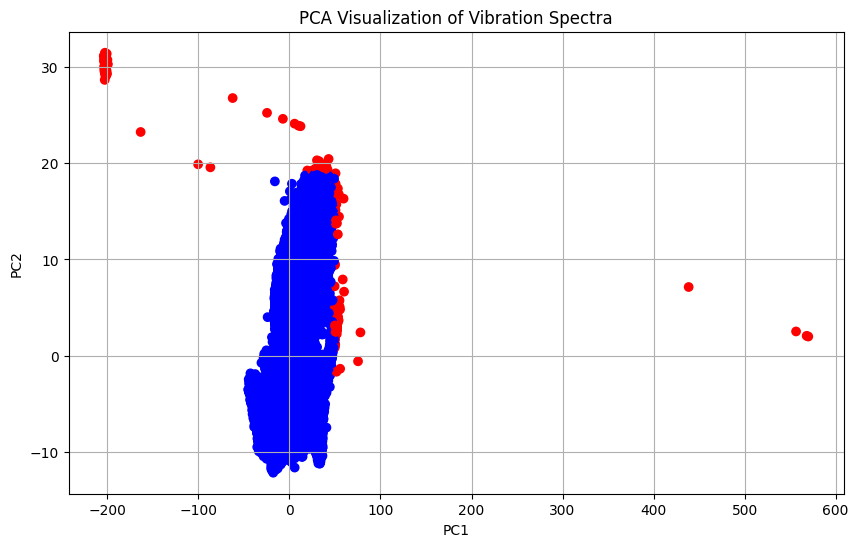

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Aplicar una normalización adicional utilizando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
pca_result = pca.fit_transform(scaled_data)

# Encontrar el percentil para identificar los puntos más alejados
percentile = 99.65 

# Calcular los umbrales para ambas componentes principales
threshold_x = np.percentile(pca_result[:, 0], percentile)
threshold_y = np.percentile(pca_result[:, 1], percentile)

# Identificar los puntos más alejados en ambas dimensiones
anomalous_labels = (pca_result[:, 0] > threshold_x) | (pca_result[:, 1] > threshold_y)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=np.where(anomalous_labels, 'red', 'blue'))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization of Vibration Spectra')
plt.grid(True)
plt.show()



Número de anomalías detectadas: 161


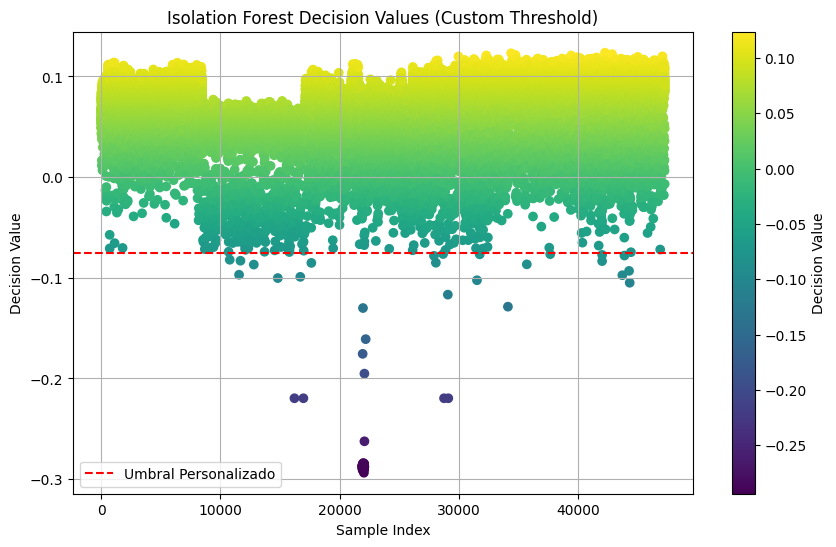

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Crear el modelo de Isolation Forest con ajuste automático de "contamination"
model = IsolationForest(contamination="auto", random_state=42)

# Entrenar el modelo
model.fit(data)

# Obtener los valores de decisión para cada muestra
decision_values = model.decision_function(data)

# Definir un umbral personalizado
custom_threshold = -0.075

anomaly_indices_Isolation = np.where(decision_values < custom_threshold)[0]

# Número de anomalías detectadas
num_anomalies = len(anomaly_indices_Isolation)

print("Número de anomalías detectadas:", num_anomalies)

# Visualización de los valores de decisión con el umbral personalizado
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), decision_values, c=decision_values, cmap='viridis')
plt.axhline(y=custom_threshold, color='r', linestyle='--', label='Umbral Personalizado')
plt.xlabel('Sample Index')
plt.ylabel('Decision Value')
plt.title('Isolation Forest Decision Values ​​(Custom Threshold)')
plt.colorbar(label='Decision Value')
plt.legend()
plt.grid(True)
plt.show()


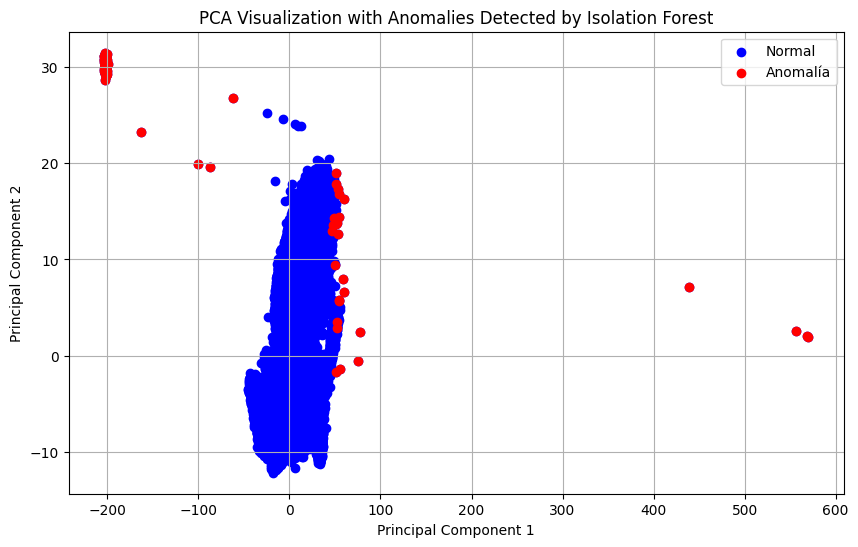

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
pca_result = pca.fit_transform(scaled_data)

# Visualización PCA con puntos detectados como anomalías en rojo
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label='Normal')
plt.scatter(pca_result[anomaly_indices_Isolation, 0], pca_result[anomaly_indices_Isolation, 1], c='red', label='Anomalía')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Anomalies Detected by Isolation Forest')
plt.legend()
plt.grid(True) 
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Crear el modelo Local Outlier Factor
model = LocalOutlierFactor(contamination="auto", n_neighbors = 150)

# Ajustar el modelo y obtener las etiquetas de anomalía (-1 para anomalía, 1 para normal)
labels = model.fit_predict(data)

# Identificar las anomalías (etiqueta -1)
anomaly_indices_LOF = np.where(labels == -1)[0]

# Número de anomalías detectadas
num_anomalies = len(anomaly_indices_LOF)

print("Número de anomalías detectadas:", num_anomalies)


Número de anomalías detectadas: 282


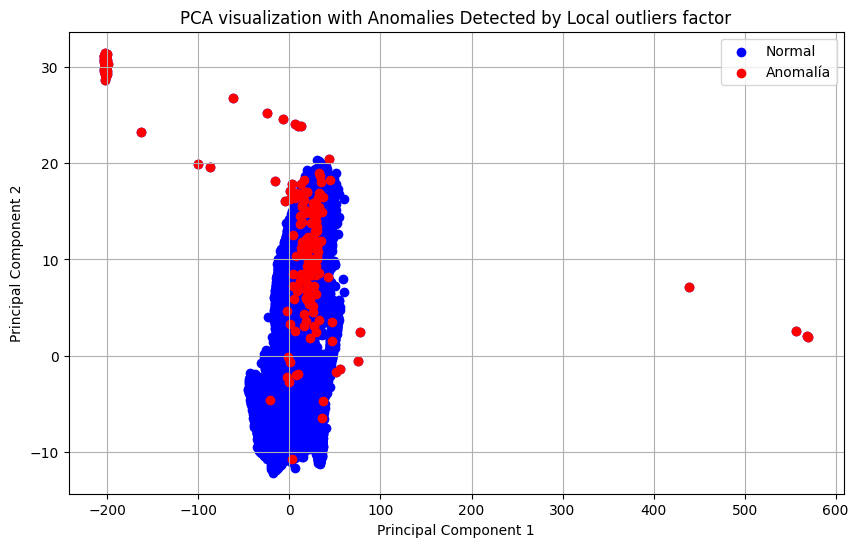

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
pca_result = pca.fit_transform(scaled_data)

# Visualización PCA con puntos detectados como anomalías en rojo
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label='Normal')
plt.scatter(pca_result[anomaly_indices_LOF, 0], pca_result[anomaly_indices_LOF, 1], c='red', label='Anomalía')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA visualization with Anomalies Detected by Local outliers factor')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
# Encontrar las anomalías detectadas por ambos modelos
anomalies_detected_by_both = np.intersect1d(anomaly_indices_Isolation, anomaly_indices_LOF)

# Número de anomalías detectadas por ambos modelos
num_anomalies_detected_by_both = len(anomalies_detected_by_both)

print("Número de anomalías detectadas por ambos modelos:", num_anomalies_detected_by_both)

Número de anomalías detectadas por ambos modelos: 140


In [49]:
anomalies_detected_by_both

array([16215, 16966, 21922, 21923, 21924, 21925, 21926, 21927, 21928,
       21929, 21930, 21931, 21932, 21933, 21934, 21935, 21938, 21939,
       21940, 21941, 21942, 21943, 21944, 21945, 21946, 21947, 21948,
       21949, 21950, 21951, 21952, 21953, 21954, 21955, 21956, 21957,
       21958, 21959, 21960, 21961, 21962, 21963, 21964, 21965, 21966,
       21967, 21969, 21970, 21971, 21972, 21973, 21974, 21975, 21976,
       21977, 21978, 21980, 21982, 21983, 21984, 21985, 21986, 21987,
       21988, 21989, 21990, 21991, 21992, 21993, 21994, 21995, 21996,
       21997, 21998, 21999, 22000, 22001, 22002, 22003, 22004, 22005,
       22006, 22007, 22008, 22009, 22010, 22011, 22012, 22013, 22014,
       22015, 22016, 22017, 22018, 22019, 22020, 22021, 22022, 22023,
       22024, 22025, 22026, 22027, 22028, 22029, 22030, 22031, 22032,
       22033, 22034, 22035, 22036, 22037, 22038, 22039, 22040, 22041,
       22043, 22044, 22045, 22046, 22047, 22049, 22050, 22051, 22052,
       22053, 22054,

In [50]:
data

array([[-10.8015206 , -10.63703645, -10.99762946, ..., -12.44062083,
        -13.01811039, -15.33557545],
       [-10.99492504, -10.83647636, -10.84730592, ..., -14.03383328,
        -13.58798536, -15.48908741],
       [-11.88621323, -11.04449675, -10.94686048, ..., -13.83506078,
        -14.34805546, -15.91072342],
       ...,
       [-10.78583031, -10.76954791, -10.22986228, ..., -10.90320011,
        -10.61220687, -11.70719666],
       [-11.56368052, -10.91196733, -10.5867624 , ..., -12.10599375,
        -12.05606926, -12.62717167],
       [-11.01442201, -10.64148035, -10.98267417, ..., -11.8487854 ,
        -11.76947153, -12.56163189]])

In [52]:
data2 = datasensor("sensor_5").dropna().values


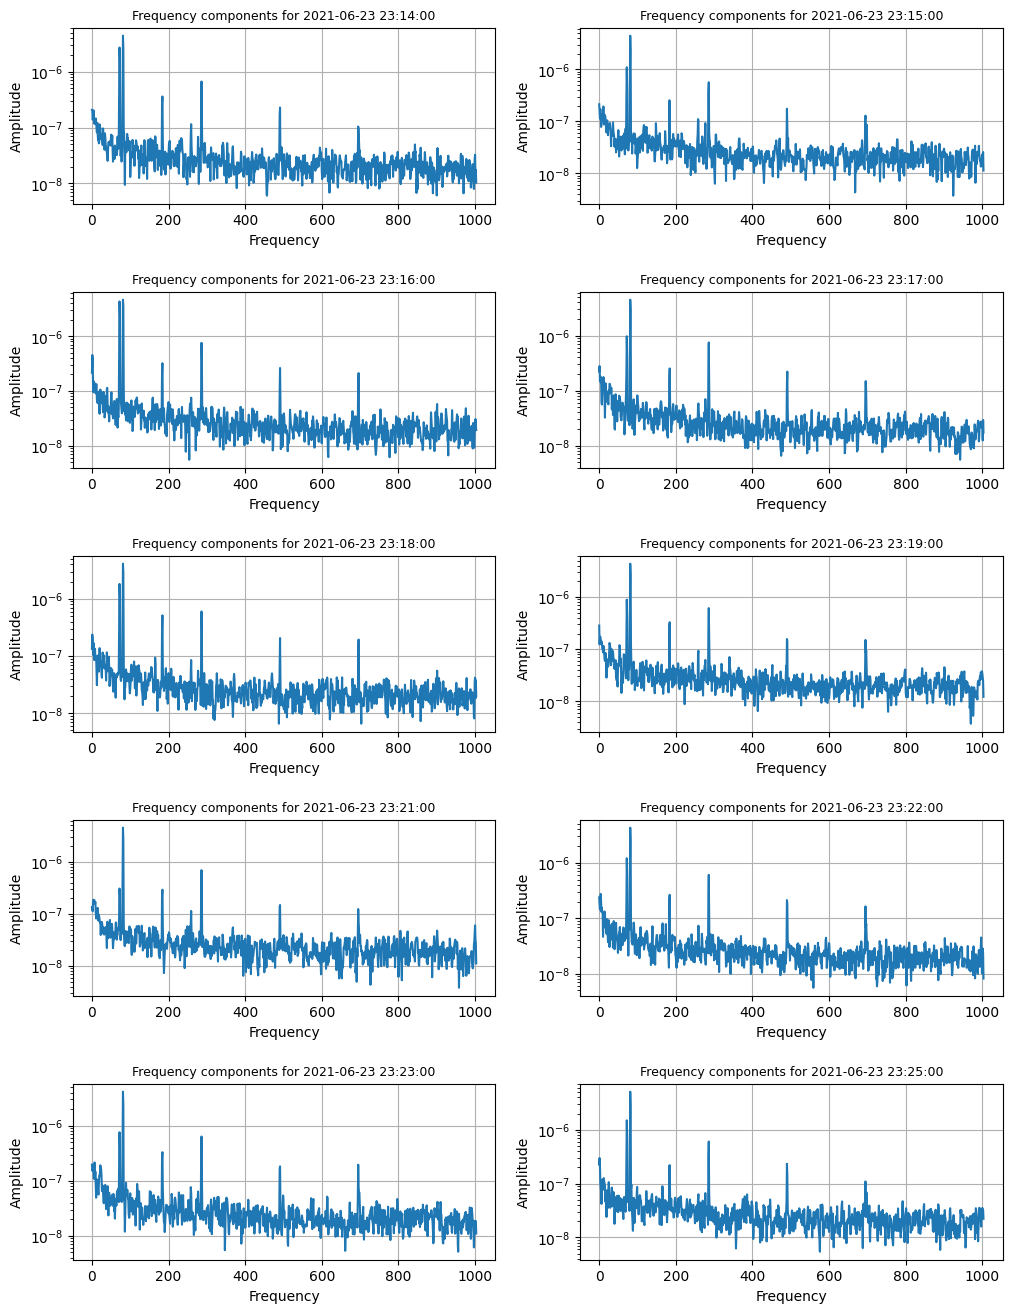

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

for ax, index in zip(axes.flat, anomalies_detected_by_both[2:12]):
    fecha = fechas[index]
    outliers = data2[index]

    ax.plot(outliers)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Frequency components for {fecha}', fontsize=9)
    ax.set_yscale('log')
    ax.grid(True)

plt.show()
